In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
X = data[:,0]
Y = data[:,1]
Z = data[:,2]
T = data[:,3]

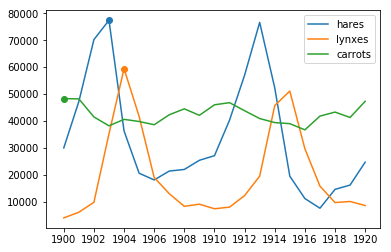

In [3]:
#предыдущие задания были разобраны на семинаре
#problem5
plt.scatter(X[np.argmax(Y)],max(Y))
plt.plot(X,Y,label = "hares")
plt.scatter(X[np.argmax(Z)],max(Z))
plt.plot(X,Z,label = "lynxes")
plt.scatter(X[np.argmax(T)],max(T))
plt.plot(X,T,label = "carrots")
plt.xticks(np.arange(1900, 1921, step=2))
plt.legend()
plt.show()

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


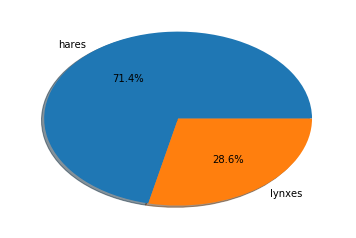

In [4]:
#problem6
arr = np.where(Y >= Z, 'H', 'L').tolist()
print(arr)
plt.pie([arr.count('H'),arr.count('L')], labels = ['hares','lynxes'],autopct='%.1f%%',shadow = True)
plt.show()

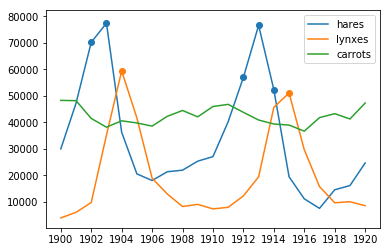

In [5]:
#problem7
mask_H = Y > 50000
mask_L = Z > 50000
mask_C = T > 50000
plt.plot(X,Y,label = "hares")
plt.plot(X,Z,label = "lynxes")
plt.plot(X,T,label = "carrots")
plt.scatter(X[mask_H],Y[mask_H])
plt.scatter(X[mask_L],Z[mask_L])
plt.scatter(X[mask_C],T[mask_C])
plt.xticks(np.arange(1900, 1921, step=2))
plt.legend()
plt.show()

In [6]:
#problem8
def get_second(X, first_index):
    if (np.argmin(X) >= first_index):
        return np.argmin(X) + 1
    return np.argmin(X)
print("Worst 2 years for hares: ",int(X[np.argmin(Y)])," and ",int(X[get_second(np.delete(Y,np.argmin(Y)),np.argmin(Y))]))
print("Worst 2 years for lynxes: ",int(X[np.argmin(Z)])," and ",int(X[get_second(np.delete(Z,np.argmin(Z)),np.argmin(Z))]))
print("Worst 2 years for carrots: ",int(X[np.argmin(T)])," and ",int(X[get_second(np.delete(T,np.argmin(T)),np.argmin(T))]))

Worst 2 years for hares:  1917  and  1916
Worst 2 years for lynxes:  1900  and  1901
Worst 2 years for carrots:  1916  and  1903


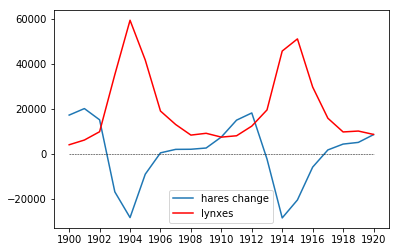

Correlation coefficient =  -0.9179248480315342


In [7]:
#problem9
gr = np.gradient(Y, 1.0)
plt.plot(X,gr, label = "hares change")
plt.plot(X,Z, label = "lynxes", color = "red")
plt.plot(X,np.zeros(len(X)), color = "black",linestyle="--",linewidth = 0.5)
plt.xticks(np.arange(1900, 1921, step=2))
plt.legend()
plt.show()
print("Correlation coefficient = ", (np.mean(gr*Z) - np.mean(gr) * np.mean(Z))/pow((np.mean(gr*gr) - np.mean(gr)*np.mean(gr))*(np.mean(Z*Z) - np.mean(Z)*np.mean(Z)),1/2)) 

Hares vs lynxes:



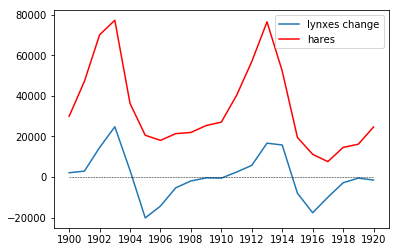

Hares vs carrots:



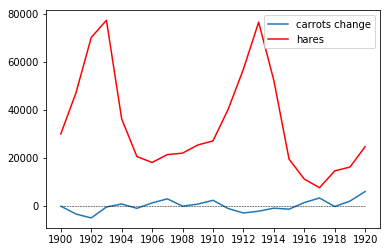

In [8]:
#problem10
print("Hares vs lynxes:\n")
gr = np.gradient(Z, 1.0)
plt.plot(X,gr, label = "lynxes change")
plt.plot(X,Y, label = "hares", color = "red")
plt.plot(X,np.zeros(len(X)), color = "black",linestyle="--",linewidth = 0.5)
plt.xticks(np.arange(1900, 1921, step=2))
plt.legend()
plt.show()
print("Hares vs carrots:\n")
gr = np.gradient(T, 1.0)
plt.plot(X,gr, label = "carrots change")
plt.plot(X,Y, label = "hares", color = "red")
plt.plot(X,np.zeros(len(X)), color = "black",linestyle="--",linewidth = 0.5)
plt.xticks(np.arange(1900, 1921, step=2))
plt.legend()
plt.show()

In [15]:
#problem11
def fit_(X):
    return (X - np.mean(X))/(max(X) - min(X))
data_ = np.delete(data, 20, 0)
for i in range(4):
    data_[:,i] = fit_(data_[:,i])
def scalar_multiply(u,w):
    return np.sum(np.multiply(u,w))
def function(data, theta):
    return theta[0] + theta[1] * data[:,0] + theta[2] * data[:,2] + theta[3] * data[:,3]
def cost_function(data, theta):
    vector = function(data, theta)
    return np.sum((vector - data[:,1])*(vector - data[:,1])) * 1/40
def derivative(vector, data, i):
    return 1/20 * scalar_multiply(vector - data[:,1], data[:,i])
def linear_regression(data, eps, learning_rate):
    theta = np.array([1/2,1/2,1/2,1/2])
    value_of_cost_function = 0
    while True: #gradient descent
        vector = function(data, theta)
        change = np.array([np.sum(vector - data[:,1])/20,derivative(vector, data, 0), derivative(vector, data, 2), derivative(vector, data, 3)])
        theta = theta - learning_rate * change 
        new_value = cost_function(data, theta)
        if (abs(new_value - value_of_cost_function) < eps):
            break
        value_of_cost_function = new_value
    return theta
theta = linear_regression(data_, 1e-7, 1e-4)#these parameters are optimal :) 
est_value = theta[0] + theta[1] * data[20][0] + theta[2] * data[20][2] + theta[3]* data[20][3]
print("Estimated value: ",est_value)
print("True value: ",data[20][1])
print("Ratio of error: ",abs(est_value - data[20][1])/data[20][1])
    

Estimated value:  25113.847092460986
True value:  24700.0
Ratio of error:  0.016754943014614835
